In [13]:
import os
import json
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import sys
sys.path.append('..')
print("Done.")
import os 
print(os.getcwd())

Done.
/home/sangbeom/autoencoder


In [14]:
class DepthDatasetLoader(Dataset):
    def __init__(self, root_path="/home/sangbeom/unity_dataset/depth/", 
                       json_name="data_loader_1m.json",
                       transform=None):
        self.root_path = root_path 
        self.json_name = json_name 
        self.json_content=[]
        for line in open(self.json_name,'r'):
            self.json_content.append(json.loads(line))
        self.image_lst = self.json_content
        self.transform = transform 
    def __len__(self):
        return len( self.image_lst)
        
    def __getitem__(self, idx):
        image_path = self.image_lst[idx]
        dir = self.root_path+image_path["file_path"]
        image = read_image(dir)
        if self.transform: 
            image = self.transform(image)
        return image
   

In [15]:
root_path = "/home/sangbeom/unity_dataset/depth/"
depth_dataset = DepthDatasetLoader(root_path=root_path)

In [16]:
loader = DataLoader(depth_dataset, batch_size=32, shuffle=True)


In [17]:
data = next(iter(loader))
print("Image batch shape", data.size())

Image batch shape torch.Size([32, 1, 375, 524])


torch.Size([312, 512, 1])


/tmp/ipykernel_59692/2046152021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


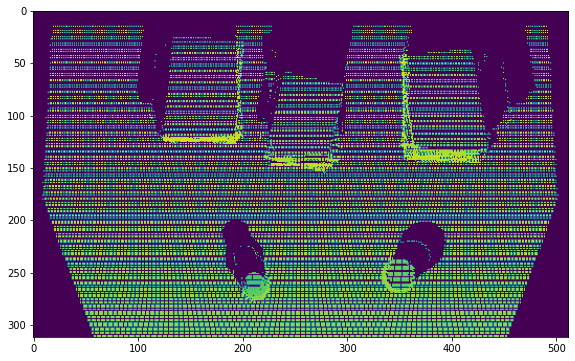

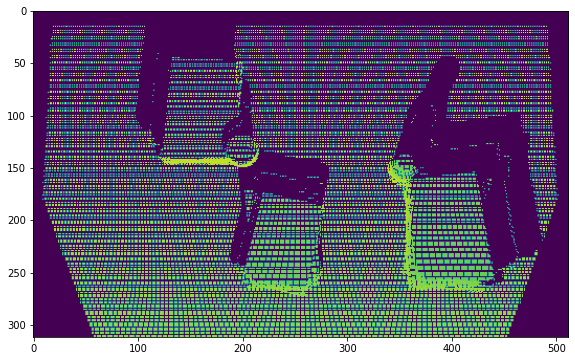

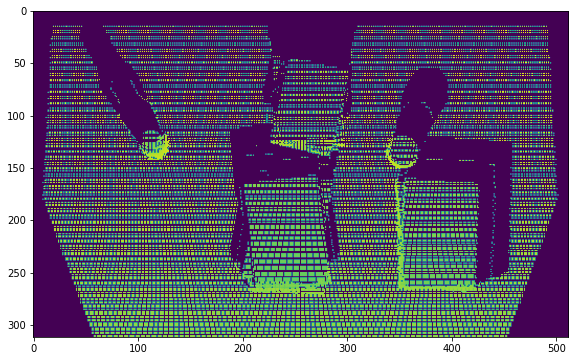

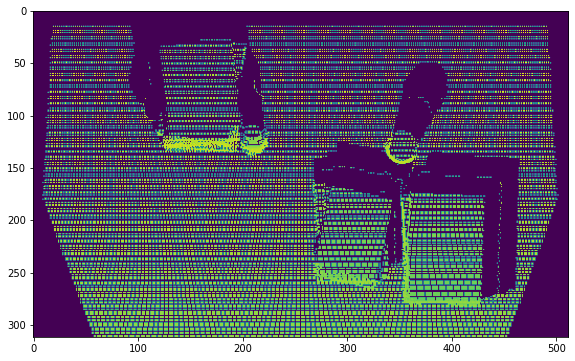

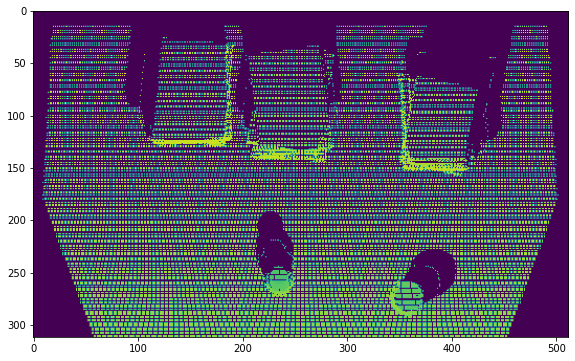

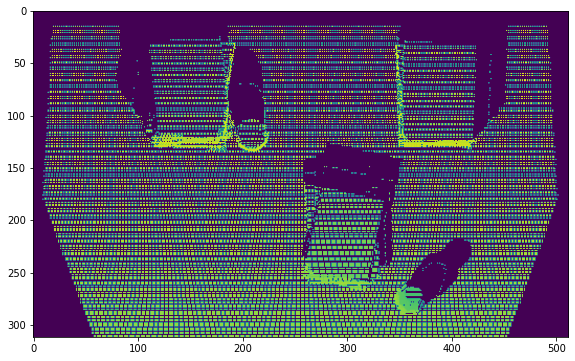

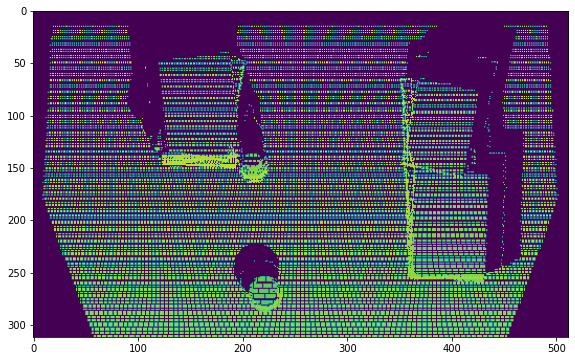

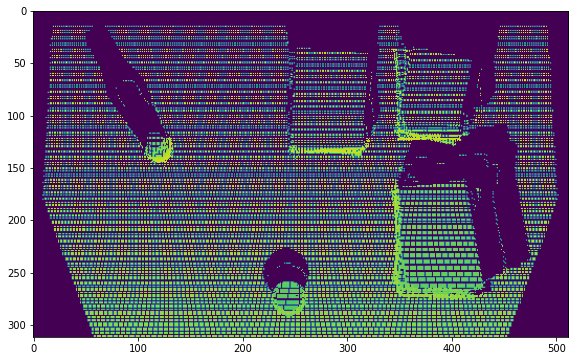

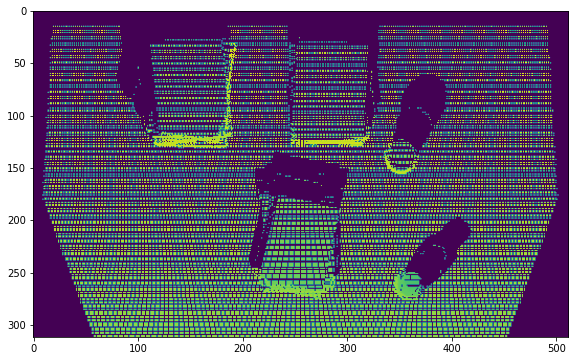

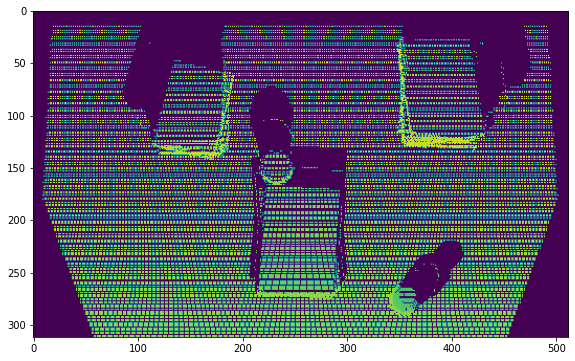

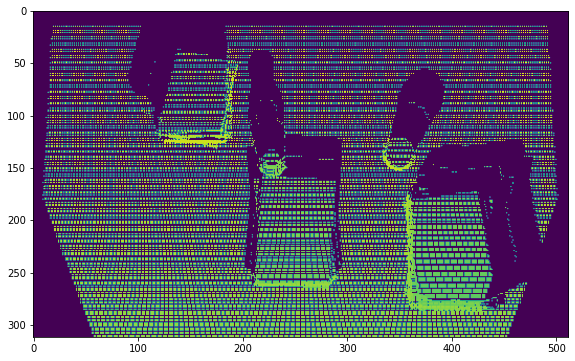

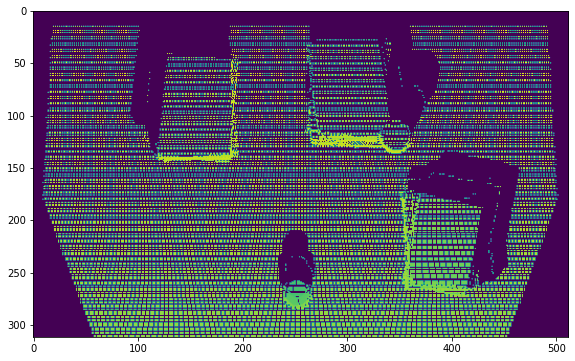

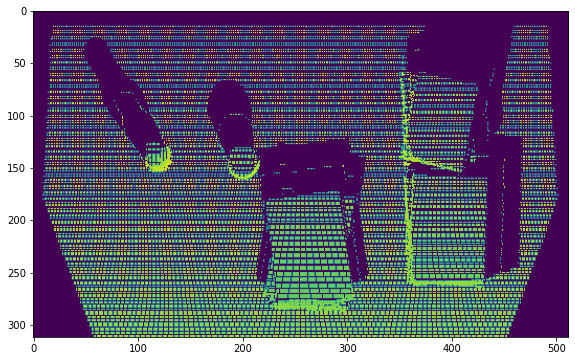

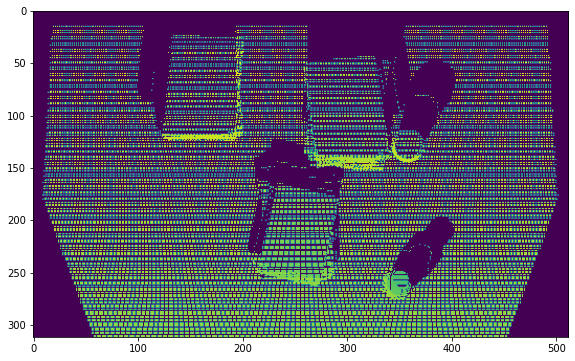

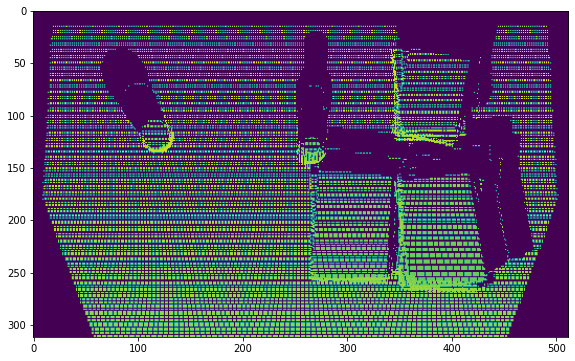

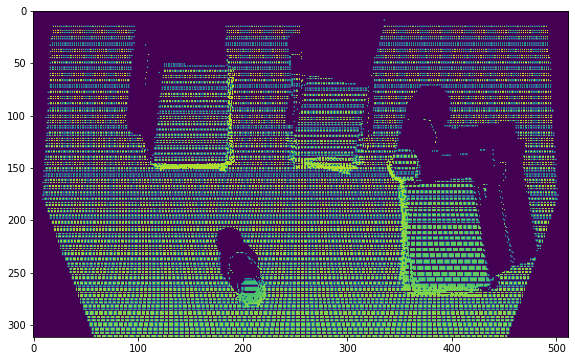

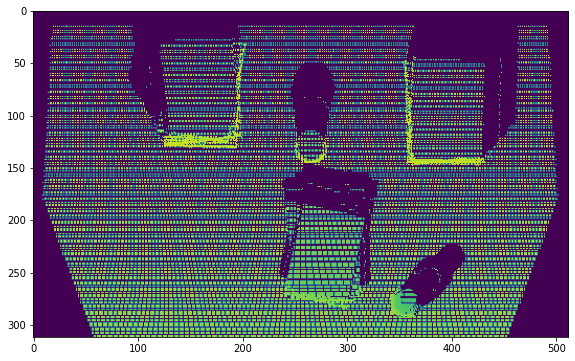

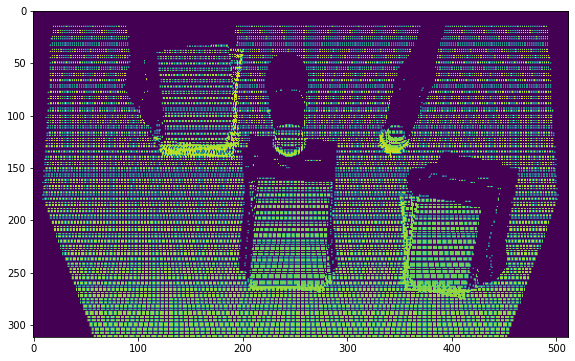

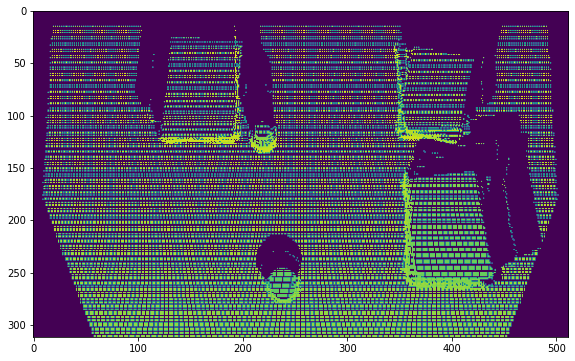

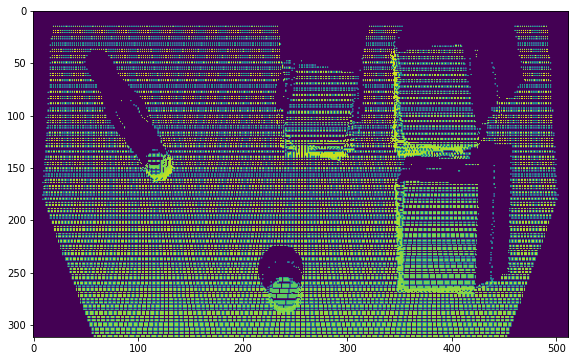

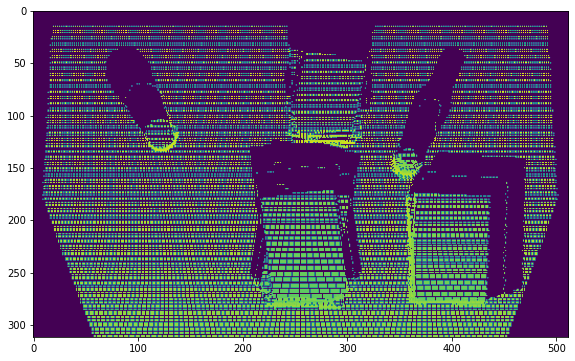

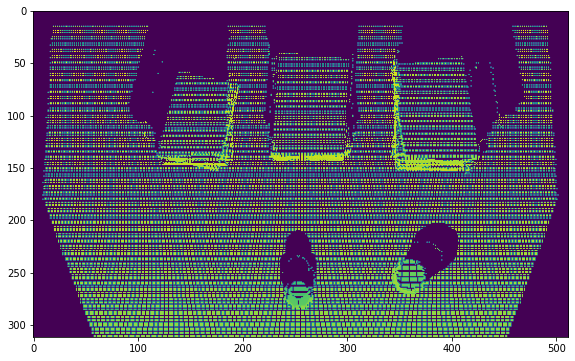

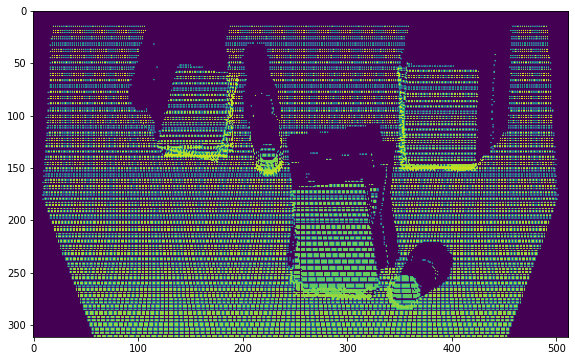

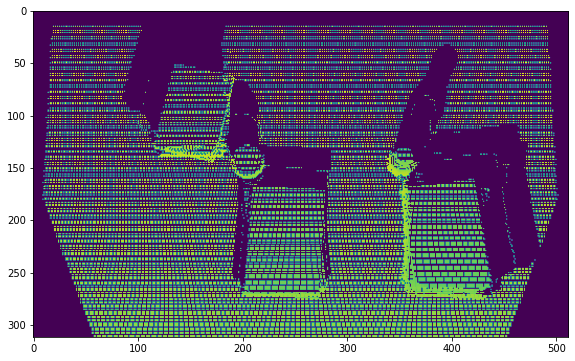

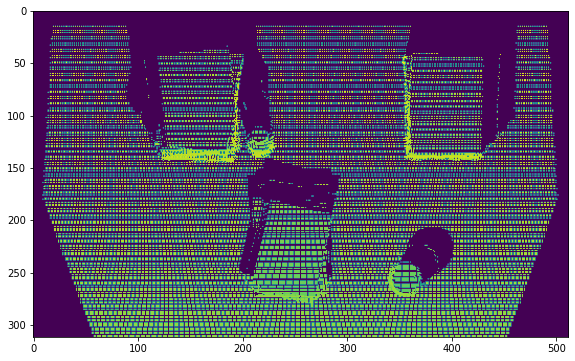

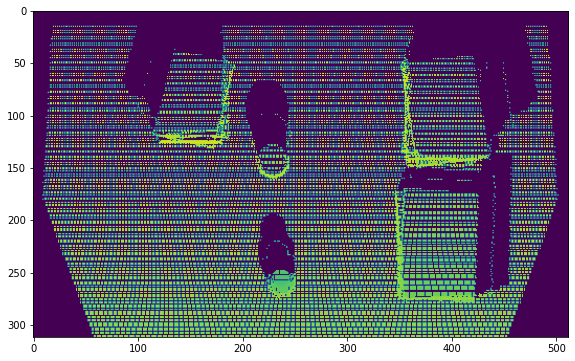

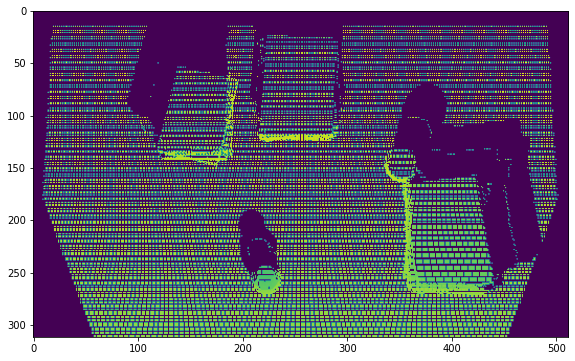

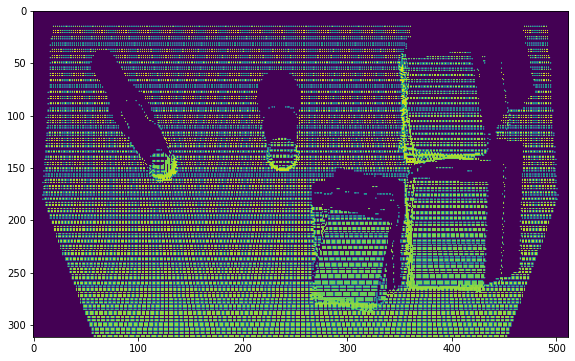

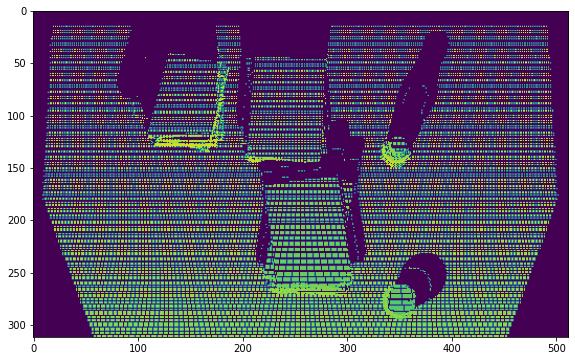

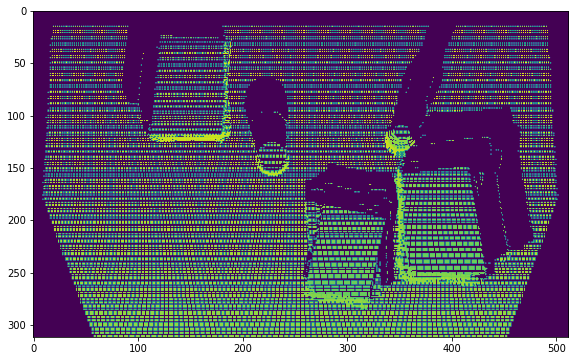

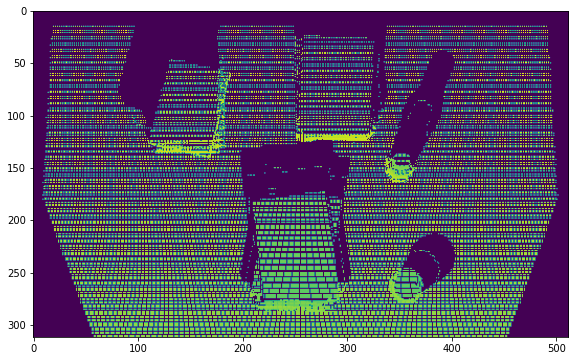

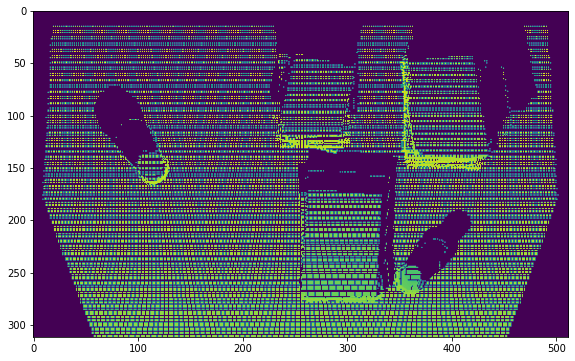

: 

In [32]:
for i in range(data.shape[0]):
    plt.figure(figsize=(10,6))
    img = data[i][:,8:328,6:-6]
    img = img.permute(1,2,0)
    plt.imshow(img)
print(img.shape)